# 1. MINST classifier with 97% accuracy

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784',version = 1, as_frame = False)
mnist.keys()
X,y = mnist['data'], mnist['target']
X_train = X[:60000]
y_train = y[:60000]

In [2]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 4, weights = "distance")
model = kNN.fit(X_train,y_train)
y_train_pred = model.predict(X_train) 

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

a = precision_score(y_train,y_train_pred, average = "weighted")
b = recall_score(y_train,y_train_pred, average = "weighted")
c = f1_score(y_train,y_train_pred, average = "weighted")
print(a,b,c)

1.0 1.0 1.0


In [4]:
X_test = X[60000:]
y_test = y[60000:]

In [5]:
y_test_pred = model.predict(X_test)

d = precision_score(y_test,y_test_pred, average = "weighted")
e = recall_score(y_test,y_test_pred, average = "weighted")
f = f1_score(y_test,y_test_pred, average = "weighted")
print(d,e,f)

0.9715166824529755 0.9714 0.9713597782738583


In [6]:
from sklearn.model_selection import GridSearchCV

KNN = KNeighborsClassifier()
param_grid = [
                {'weights': ['uniform','distance'],'n_neighbors':[3,4,5]}
]
grid_search = GridSearchCV(KNN, param_grid,cv = 5, verbose = 3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  19.7s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  19.6s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  21.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  23.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  21.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  18.8s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  18.4s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  18.8s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  18.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  20.9s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  20.5s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [7]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

# 2.Data Augumentation

In [8]:
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

C:\Users\TAMIL SELVAN\AppData\Local\Temp\ipykernel_7304\2468852759.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [9]:
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dx,dy], cval=0, mode='constant')
    return shifted_image.reshape([-1])

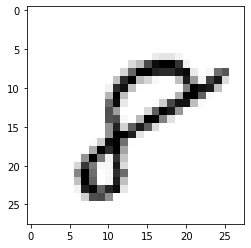

In [10]:
image = X_train[59999]

plt.imshow(image.reshape(28,28), interpolation = 'nearest', cmap = 'Greys')

In [11]:
X_train_augumented = [image for image in X_train]
y_train_augumented = [image for image in y_train]

for dy, dx in ((1,0),(-1,0),(0,1),(0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augumented.append(shift_image(image, dx, dy))
        y_train_augumented.append(label)
X_train_augumented = np.array(X_train_augumented)
y_train_augumented = np.array(y_train_augumented)

In [12]:
shuffle_idx = np.random.permutation(len(X_train_augumented))
X_train_augumented = X_train_augumented[shuffle_idx]
y_train_augumented = y_train_augumented[shuffle_idx]
shuffle_idx

array([255949, 281114, 242637, ..., 239405, 119538, 199139])

In [13]:
knn_clf = KNeighborsClassifier(weights = 'distance', n_neighbors = 4)
knn_clf.fit(X_train_augumented, y_train_augumented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [14]:
y_test = y_test.reshape(-1)
y_pred = knn_clf.predict(X_test)


In [15]:
accuracy_score(y_pred, y_test)

0.9763

# Titanic classifier

In [16]:
import pandas as pd
import numpy as np

#load dataset
train_data = pd.read_csv("G:/MLbook/Titanic Kaggle/train.csv")
test_data = pd.read_csv("G:/MLbook/Titanic Kaggle/test.csv")

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse = False))
])

In [18]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [19]:
X_train = preprocess_pipeline.fit_transform(
          train_data[num_attribs + cat_attribs])
y_train = train_data["Survived"]

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_features = 4, n_estimators = 119, random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=119, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

y_train_pred = forest_clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9797979797979798

In [22]:
X_test = preprocess_pipeline.fit_transform(
         test_data[num_attribs+cat_attribs])
y_pred = forest_clf.predict(X_test)

handson_submission = pd.DataFrame()
handson_submission['PassengerId'] = test_data['PassengerId']
handson_submission['Survived'] = y_pred.astype('int64')
handson_submission.to_csv('handson_submission.csv', index = False)

In [23]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train,y_train, cv = 10)
forest_scores.mean()

0.8149063670411983

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low = 1, high = 200),
    'max_features' : randint(low = 3, high = 5)
}

rnd_search = RandomizedSearchCV(forest_clf, param_distributions = param_distribs,
                               n_iter = 30, cv = 5, verbose = 3)

rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..max_features=4, n_estimators=151;, score=0.799 total time=   0.5s
[CV 2/5] END ..max_features=4, n_estimators=151;, score=0.815 total time=   0.5s
[CV 3/5] END ..max_features=4, n_estimators=151;, score=0.848 total time=   0.5s
[CV 4/5] END ..max_features=4, n_estimators=151;, score=0.775 total time=   0.5s
[CV 5/5] END ..max_features=4, n_estimators=151;, score=0.854 total time=   0.5s
[CV 1/5] END ...max_features=4, n_estimators=10;, score=0.788 total time=   0.0s
[CV 2/5] END ...max_features=4, n_estimators=10;, score=0.798 total time=   0.0s
[CV 3/5] END ...max_features=4, n_estimators=10;, score=0.843 total time=   0.0s
[CV 4/5] END ...max_features=4, n_estimators=10;, score=0.798 total time=   0.0s
[CV 5/5] END ...max_features=4, n_estimators=10;, score=0.820 total time=   0.0s
[CV 1/5] END ..max_features=4, n_estimators=133;, score=0.804 total time=   0.4s
[CV 2/5] END ..max_features=4, n_estimators=133

[CV 2/5] END ..max_features=3, n_estimators=131;, score=0.798 total time=   0.3s
[CV 3/5] END ..max_features=3, n_estimators=131;, score=0.848 total time=   0.4s
[CV 4/5] END ..max_features=3, n_estimators=131;, score=0.781 total time=   0.4s
[CV 5/5] END ..max_features=3, n_estimators=131;, score=0.826 total time=   0.4s
[CV 1/5] END ..max_features=4, n_estimators=166;, score=0.793 total time=   0.5s
[CV 2/5] END ..max_features=4, n_estimators=166;, score=0.815 total time=   0.4s
[CV 3/5] END ..max_features=4, n_estimators=166;, score=0.848 total time=   0.5s
[CV 4/5] END ..max_features=4, n_estimators=166;, score=0.775 total time=   0.5s
[CV 5/5] END ..max_features=4, n_estimators=166;, score=0.843 total time=   0.5s
[CV 1/5] END ...max_features=4, n_estimators=52;, score=0.782 total time=   0.0s
[CV 2/5] END ...max_features=4, n_estimators=52;, score=0.815 total time=   0.1s
[CV 3/5] END ...max_features=4, n_estimators=52;, score=0.837 total time=   0.1s
[CV 4/5] END ...max_features

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_features=4,
                                                    n_estimators=119,
                                                    random_state=42),
                   n_iter=30,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001929DFD76D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001929DFD7F40>},
                   verbose=3)

In [25]:
rnd_search.best_params_

{'max_features': 4, 'n_estimators': 133}

# Spam Classifier

In [26]:
import os
import tarfile 
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url = HAM_URL, spam_url = SPAM_URL, spam_path = SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path = spam_path)
        tar_bz2_file.close()

In [27]:
fetch_spam_data()

In [28]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")

ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name)>20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name)>20]

In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
len(ham_filenames)
len(spam_filenames)

500

In [30]:
import email 
import email.policy

def load_email(is_spam, filename, spam_path = SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)

In [31]:
ham_emails = [load_email(is_spam = False, filename = name) for name in ham_filenames]
spam_emails = [load_email(is_spam = True, filename = name) for name in spam_filenames]

In [32]:
print(ham_emails[0].get_content().strip())

Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 

In [33]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [34]:
def get_email_structure(email):
    if isinstance(email, str):
        #print('True')
        return email
    payload = email.get_payload()
    #print(payload)
    if isinstance(payload, list):
        return "multipart({})".format(','.join([get_email_structure(sub_mail) for sub_mail in payload]))
    else:
        #print(email.get_content_type())
        return email.get_content_type()

In [35]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        #print(structure)
        structures[structure] += 1
        #print(structures)
    return structures

In [36]:
structures_counter(ham_emails[13:17]).most_common()

[('text/plain', 3), ('multipart(text/plain,application/pgp-signature)', 1)]

In [37]:
t = structures_counter(spam_emails).most_common()

In [38]:
print(ham_emails[14].get_content().strip())

SpamAssassin is hurting democracy!
Owen
---------------------------------------------------------------------------------------------------------------------

http://www.bayarea.com/mld/mercurynews/news/opinion/3900215.htm

Internet can level the political playing field
By Mike McCurry and Larry Purpuro

NOT many months from now, people across the country will experience one 
of the great recurring features of American democracy. At shopping 
malls, on factory floors, at church socials and even on our front 
stoops, we will be approached by individuals who want to represent us in 
public office. While chances are high that we won't know them 
personally, they will walk up to us, offer a handshake and a flier and 
ask for our votes.

Just as technology is affecting every other area of communication, it 
has begun to affect the way political candidates communicate with voters.

In this year's GOP gubernatorial primary, California Secretary of State 
Bill Jones, who faced better-funded ca

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags = re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', 'HYPERLINK', text, flags = re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags = re.M | re.S)
    text = re.sub(r'(\s*\n)+','\n', text, flags = re.M | re.S)
    return unescape(text)


In [41]:
html_spam_mails = [email for email in X_train[y_train == 1] if get_email_structure(email) == "text/html"]

sample_html_spam = html_spam_mails[7]
print(sample_html_spam.get_content().strip()[:1001], " ...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [42]:
print(html_to_plain_text(sample_html_spam.get_content().strip())[:1001], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [43]:
def email_to_text(email):
    html = None
    #print(email.walk())
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ('text/plain', 'text/html'):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
            #print(html)
    if html:
        return html_to_plain_text(html)

We go through every part of the mail and check if it is "text/plain" or "text/html". If even one part of the mail is "text/html", then the email will be passed to html_to_plain_text() and will be returned

In [44]:
print(email_to_text(sample_html_spam)[:100],"000")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat 000


In [45]:
pip install nltk

In [46]:
try:
    import nltk
    
    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "computed", "computing", "computation", "compute", "compulsive", "convergence"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print(" Error: Stemming requires the NLTK module")
    stemmer = None
    

Computations => comput
computed => comput
computing => comput
computation => comput
compute => comput
compulsive => compuls
convergence => converg


In [47]:
%pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [48]:
try:
    import urlextract
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("will it detect github.com and https://www.youtube.com/watch?v=Y1Gndz4sNeE"))

except ImportError:
    print("Error: replacing URLs requires the urlextract module. ")
    url_extractor = None

['github.com', 'https://www.youtube.com/watch?v=Y1Gndz4sNeE']


In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers = True, lower_case = True, remove_punctuation = True,
                replace_urls = True, replace_numbers = True, stemming = True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key = lambda url: len(url), reverse = True)
                for url in urls:
                    text = text.replace(url, "URL")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags = re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

                                 

In [50]:
X_few = X_train[3:5]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
for i, (w,n) in enumerate(t):
    print(i,w,n)

0 text/plain 218
1 text/html 183
2 multipart(text/plain,text/html) 45
3 multipart(text/html) 20
4 multipart(text/plain) 19
5 multipart(multipart(text/html)) 5
6 multipart(text/plain,image/jpeg) 3
7 multipart(text/html,application/octet-stream) 2
8 multipart(text/plain,application/octet-stream) 1
9 multipart(text/html,text/plain) 1
10 multipart(multipart(text/html),application/octet-stream,image/jpeg) 1
11 multipart(multipart(text/plain,text/html),image/gif) 1
12 multipart/alternative 1


In [51]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size = 1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y = None):
        total_counter = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_counter[word] += min(count, 10)
        most_common = total_counter.most_common()[:self.vocabulary_size]
        self.vocabulary_ = { word: index+1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y = None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape = (len(X), self.vocabulary_size+1))

In [52]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size = 10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors.toarray()

array([[49,  2,  6,  1,  0,  0,  2,  1,  1,  0,  2],
       [79,  8,  2,  6,  5,  5,  2,  3,  3,  4,  1]], dtype=int32)

In [53]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train) 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf =  LogisticRegression(solver = "lbfgs", max_iter = 1000, random_state = 42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv = 3, verbose = 3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.981) total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.981) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] END ................................ score: (test=0.991) total time=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


0.9845833333333333

In [55]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

LogisticRegression(max_iter=1000, random_state=42)

Precision: 94.90%
Recall: 97.89%


In [56]:
print("Precision: {:.2f}%".format(100*precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100*recall_score(y_test, y_pred)))
print("f1_score: {:.2f}%".format(100*f1_score(y_test, y_pred)))

Precision: 94.90%
Recall: 97.89%
f1_score: 96.37%
